In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.utils import reverse_cuthill_mckee_ordering

In [2]:
def get_bandwidth(G):
    L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes)) # Laplacian Matrix
    x,y = np.nonzero(L)
    return (y-x).max()+(x-y).max()+1
    

def print_nodes_info(G):
    print("------------------------------------------")
    for n in sorted(G.nodes()):
        print('Id node {} has label {} / degree: {}'.format(G.nodes[n]['id'], n, G.degree(n)))
    print("------------------------------------------")


def plot_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.show()

In [3]:
# building graph
G = nx.Graph()
G.add_edges_from([(0,1),(6,7),(1,2),(0,8),(2,3),(0,4),(0,5),(3,6),(6,4),(6,5),(1,3)])

# add ids to nodes
attrs = dict()
for i in range(9):
    attrs[i] = {'id': i}
nx.set_node_attributes(G, attrs)

print_nodes_info(G)

------------------------------------------
Id node 0 has label 0 / degree: 4
Id node 1 has label 1 / degree: 3
Id node 2 has label 2 / degree: 2
Id node 3 has label 3 / degree: 3
Id node 4 has label 4 / degree: 2
Id node 5 has label 5 / degree: 2
Id node 6 has label 6 / degree: 4
Id node 7 has label 7 / degree: 1
Id node 8 has label 8 / degree: 1
------------------------------------------


Bandwidth of G: 17


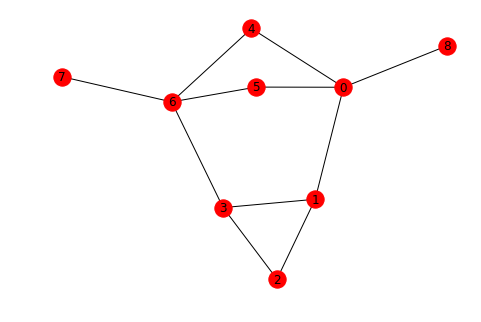

In [4]:
print('Bandwidth of G: %d' % get_bandwidth(G))
plot_graph(G)

{7: 0, 3: 1, 2: 2, 6: 3, 1: 4, 5: 5, 4: 6, 0: 7, 8: 8}
Bandwidth of G: 7


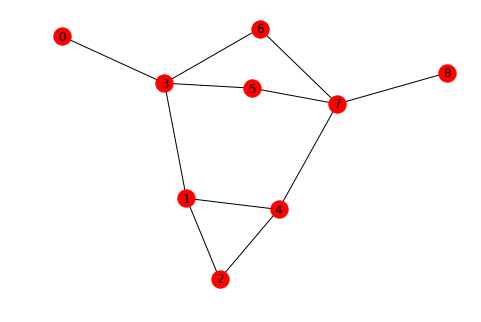

------------------------------------------
Id node 7 has label 0 / degree: 1
Id node 3 has label 1 / degree: 3
Id node 2 has label 2 / degree: 2
Id node 6 has label 3 / degree: 4
Id node 1 has label 4 / degree: 3
Id node 5 has label 5 / degree: 2
Id node 4 has label 6 / degree: 2
Id node 0 has label 7 / degree: 4
Id node 8 has label 8 / degree: 1
------------------------------------------


In [5]:
# relabel nodes using rcm
rcm = list(reverse_cuthill_mckee_ordering(G))
mapping = dict(zip(rcm, sorted(G.nodes)))
G = nx.relabel_nodes(G, mapping)
print(mapping)

print('Bandwidth of G: %d' % get_bandwidth(G))
plot_graph(G)
print_nodes_info(G)